In [2]:
# get data
import pandas as pd
df = pd.read_pickle("distances_outputs_table.pickle")
valse_stats = pd.read_pickle("valse_statistics.pickle")
models = ["LXMERT", "CLIP", "FLAVA", "SigLip"]

In [3]:
df.head()

,filename,caption,foil,linguistic_phenomena,model,model_shap_positive_normalized,human_map,RC_to_human,EMD_to_human,model_pred_caption,model_pred_foil,model_pred_diff,model_pred_diff_normalized
0,licking_291.jpg,A cow licks its fur.,A cow wrinkles its fur.,actions,LXMERT,"[[0.07359886674465907, 0.02998819329604594, 0....","[[0.0014743265527438847, 0.01573516504970489, ...",-0.058824,0.983263,0.004516,0.018551,-0.014034,-0.085181
1,counting_103.jpg,A person counts money.,A person pays money.,actions,LXMERT,"[[0.10524416414966785, 0.13240805706235903, 0....","[[0.004482754295119378, 0.029023927486055416, ...",-0.464706,1.118272,0.001854,0.001183,0.000671,0.004074
2,v7w_2411632.jpg,There are no people in the photo.,There is at least one person in the photo.,existence,LXMERT,"[[0.005573892832708572, 0.0672021870488928, 0....","[[7.25101021142701e-07, 0.006881846083901585, ...",0.300000,0.897321,0.516299,0.030346,0.485952,2.949508
3,urinating_251.jpg,A man urinates against a wall.,A man skates against a wall.,actions,LXMERT,"[[0.0298257918219853, 0.13789591026754916, 0.0...","[[0.012884411289709949, 0.0253810418266228, 0....",0.338235,0.714441,0.602664,0.011472,0.591192,3.588263
4,v7w_2390850.jpg,There are no people in the water.,There is at least one person in the water.,existence,LXMERT,"[[0.034739605778902866, 0.05373696695722698, 0...","[[0.04304823942671234, 0.3141493061042169, 0.2...",0.522446,1.023692,0.011590,0.001473,0.010117,0.061403


### Get avg accuracy of each model

Average across 3 phenomena

In [4]:
valse_stats

,metric (VALSE wide model output),LXMERT,CLIP,FLAVA,SigLip
0,mean,0.010805,0.953458,1.300020,1.024050
1,std,0.164757,1.709227,2.900839,2.333226
2,acc_overall,0.532802,0.715965,0.672355,0.667804
3,acc_existence,0.768317,0.691089,0.623762,0.695050
4,acc_relations,0.605607,0.659813,0.628037,0.605607
5,acc_actions,0.433939,0.742642,0.702567,0.680025


In [5]:
import numpy as np
model_accuracy_valse = {}
for model in models:
    accuracy = valse_stats[model][3:6]
    model_accuracy_valse[model]=np.mean(list(accuracy))

In [6]:
model_accuracy_valse

{'LXMERT': 0.6026209810863986,
 'CLIP': 0.69784821587514,
 'FLAVA': 0.6514556910428021,
 'SigLip': 0.6602273428496882}

# Graph

LXMERT mean: 0.26282359755637275, std: 0.28939559037793355
CLIP mean: 0.22680472326455908, std: 0.28465205618024464
FLAVA mean: 0.26625026050390066, std: 0.2715131997417358
SigLip mean: 0.23573875829298027, std: 0.29504536418224814


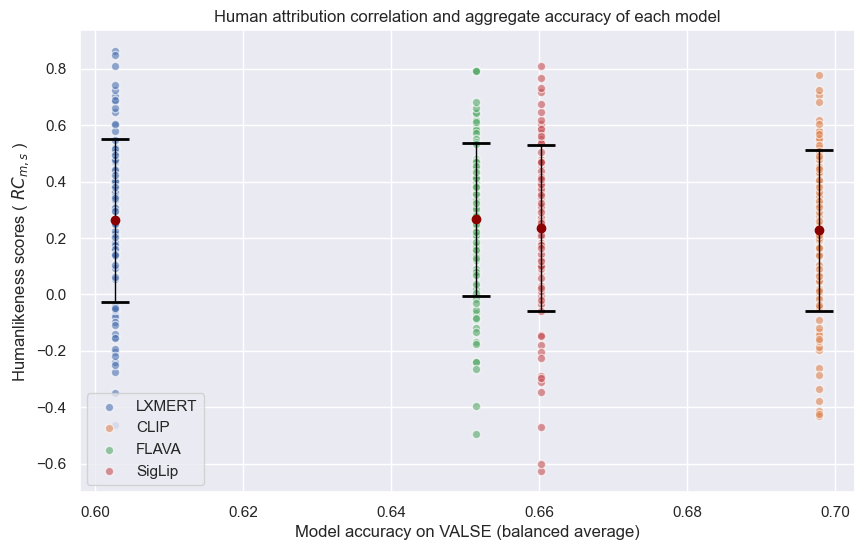

In [12]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="darkgrid")  # Apply Seaborn dark grid theme

x_label = "Model accuracy on VALSE (balanced average)"
y_label = "Humanlikeness scores ( $RC_{m,s}$ )"

plt.figure(figsize=(10, 6))  # Set the figure size

correlations_by_model = {}

for model in models:
    accuracy = model_accuracy_valse[model]
    correlations = df[df['model'] == model]['RC_to_human']
    #save correlations
    correlations_by_model[model]=list(correlations)
    accuracies = [accuracy] * len(correlations)

    plt.scatter(accuracies, list(correlations), label=model, alpha=0.6, edgecolors='white')

    y_mean = np.mean(correlations)
    y_std = np.std(correlations)
    print(f"{model} mean: {y_mean}, std: {y_std}")
    
    # Plot mean and standard deviation with more normal-looking error bars
    plt.errorbar(accuracy, y_mean, yerr=y_std, fmt='o', color="darkred", ecolor='black', elinewidth=1, capsize=10, capthick=2)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Human attribution correlation and aggregate accuracy of each model')
plt.legend(frameon=True)  
plt.show()


### One way ANOVA

Null hypothesis: the four models' rank correlations have the same mean value

In [8]:
import scipy.stats as stats

# rank correlation of each, assuming order lxmert clip flava siglip in the models variable
LXMERT_rc, CLIP_rc, FLAVA_rc, SigLip_rc = correlations_by_model.values()

f_value, p_value = stats.f_oneway(LXMERT_rc, CLIP_rc, FLAVA_rc, SigLip_rc)
print(f"F-value: {f_value}, P-value: {p_value}")

F-value: 0.42948760804182945, P-value: 0.7319959657576938


The high P value suggests we cannot reject the null hypothesis.